### Obesity - Classification

In [381]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
import matplotlib.cm as cm 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [382]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


* Gender : Male or Female
* Age : Age of the person
* Height : Height in "meter"
* Weight : Weight in "kilogram"
* family_history_with_overweight : if parents/family with obesity
* FAVC : Frequent consumption of high caloric food
* FCVC : Frequency of consumption of vegetables
* NCP : Number of main meals (per day)
* CAEC : Consumption of food between meals
* SMOKE : does the person smoke or not
* CH2O : Consumption of water daily
* SCC : Calories consumption monitoring
* FAF : Physical activity frequency (per week)
* TUE : Time using technology devices
* CALC : Alcool consumption
* MTRANS : what kind of transportation taken
* NObeyesdad : level of obesity

###  Displays the data:

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

We can see that Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS and NObeyesdad are textual attributes.<br> We will handle with them later.

In [384]:
#Other than 'Age', 'Weight' and 'Height' there is no reason for the other numeric columns to be 'float'. We'll change it.
columns = ["NCP", "CH2O", "TUE", "FAF","FCVC"]
for col in columns:
    df[col] = round(df[col]).astype('int')

Our target column is the "NObeyesdad" column, the column has 7 different values of weight definition.<br>
* Insufficient_Weight
* Normal_Weight
* Overweight_Level_I
* Overweight_Level_II
* Obesity_Type_I
* Obesity_Type_II
* Obesity_Type_III

## Data Visualization:
We will check the weight status depending on some of the features.

[Text(0, 0, 'Insufficient_Weight'),
 Text(1, 0, 'Normal_Weight'),
 Text(2, 0, 'Overweight_Level_I'),
 Text(3, 0, 'Overweight_Level_II'),
 Text(4, 0, 'Obesity_Type_I'),
 Text(5, 0, 'Obesity_Type_II'),
 Text(6, 0, 'Obesity_Type_III')]

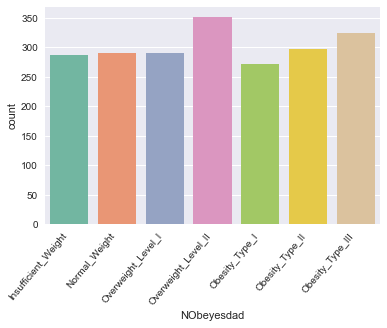

In [385]:
#first we will check if "NObeyesdad" is balanced
ax=sns.countplot(df["NObeyesdad"],palette="Set2")
ax.xaxis.set_ticklabels(['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I','Overweight_Level_II',
                         'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],rotation=50,horizontalalignment='right')

### Weight:

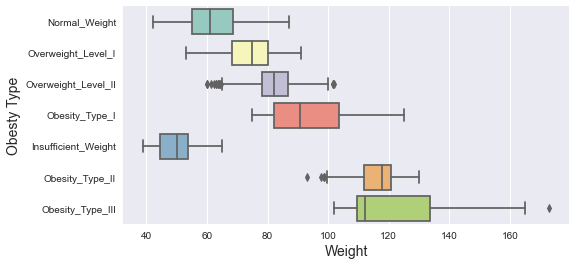

In [386]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Weight", y="NObeyesdad", data=df[["Weight","NObeyesdad"]],palette="Set3")
plt.xlabel("Weight", size=14)
plt.ylabel("Obesty Type", size=14)
plt.show()

From the boxplot we can clearly see that the 'Weight' cloumn and the 'Obesty Type' have high correlation.<br>
Let's check it.

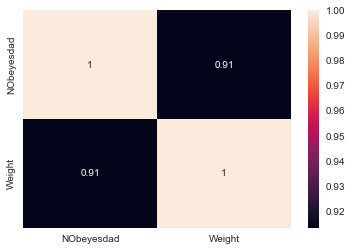

In [387]:
df['NObeyesdad'] = df['NObeyesdad'].map({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2 ,
                                        'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6})
sns.heatmap(df[['NObeyesdad','Weight']].corr(), annot=True)
plt.show()

#### FAF - Physical activity frequency (per week):

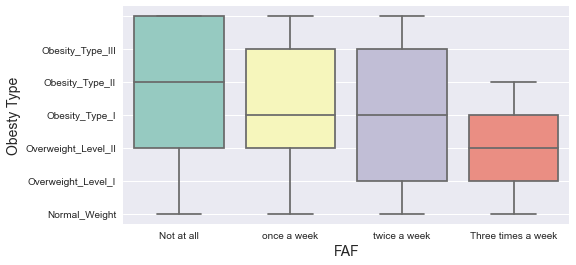

In [388]:
plt.figure(figsize=(8,4))
ax=sns.boxplot(x="FAF", y="NObeyesdad", data=df[["FAF","NObeyesdad"]],palette="Set3")
ax.yaxis.set_ticklabels(['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I','Overweight_Level_II',
                         'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],horizontalalignment='right')
ax.xaxis.set_ticklabels(['Not at all','once a week','twice a week','Three times a week'])
plt.xlabel("FAF", size=14)
plt.ylabel("Obesty Type", size=14)
plt.show()

#### We have added here graphs of data pitchers (regardless of the target column).<br> The purpose of the graphs is to help us understand the data better.

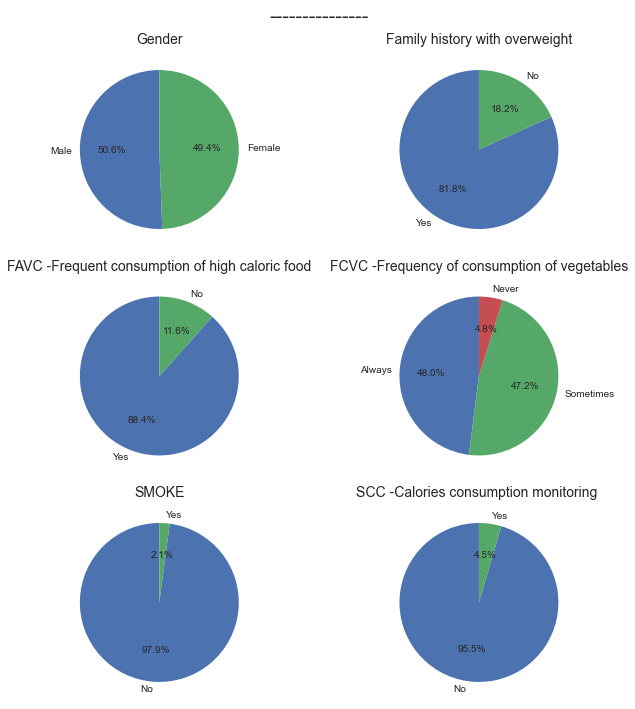

In [389]:
fig, ax = plt.subplots(3,2, figsize = (10,10))
plt.style.use('seaborn')
((ax1, ax2), (ax3, ax4), (ax5, ax6)) = ax
ax1.pie( df['Gender'].value_counts(), labels=['Male','Female'], startangle=90, autopct='%1.1f%%')
ax1.set_title("Gender",fontdict={'fontsize': 14})
ax2.pie( df['family_history_with_overweight'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax2.set_title("Family history with overweight",fontdict={'fontsize': 14})
ax3.pie( df['FAVC'].value_counts(), labels=['Yes','No'], startangle=90, autopct='%1.1f%%')
ax3.set_title("FAVC -Frequent consumption of high caloric food",fontdict={'fontsize': 14})
ax4.pie( df['FCVC'].value_counts(), labels=['Always','Sometimes','Never'], startangle=90, autopct='%1.1f%%')
ax4.set_title("FCVC -Frequency of consumption of vegetables",fontdict={'fontsize': 14})
ax5.pie( df['SMOKE'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax5.set_title("SMOKE",fontdict={'fontsize': 14})
ax6.pie( df['SCC'].value_counts(), labels=['No','Yes'], startangle=90, autopct='%1.1f%%')
ax6.set_title("SCC -Calories consumption monitoring ",fontdict={'fontsize': 14})
fig.suptitle("---------------", fontsize=20)
plt.tight_layout()
plt.show()

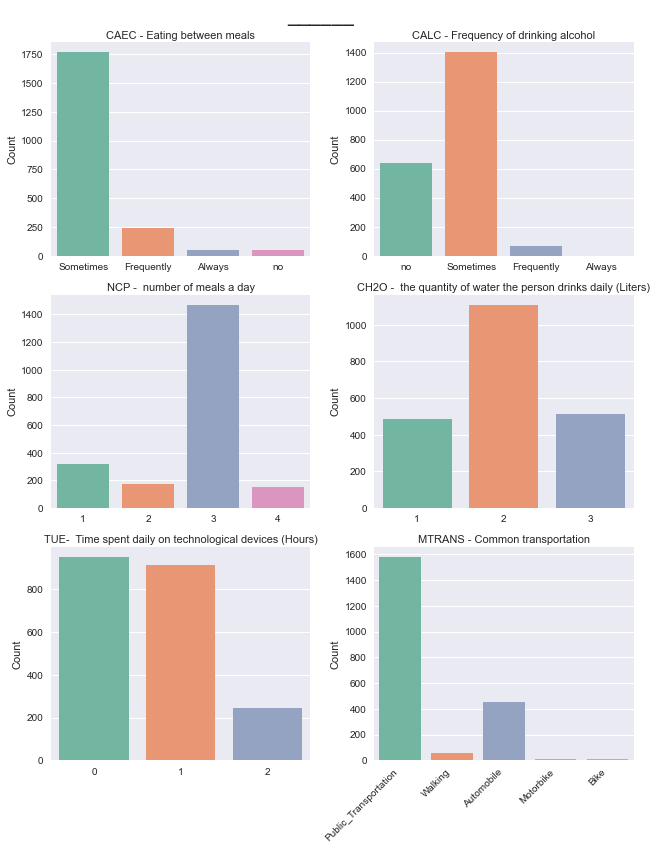

In [351]:
columns = ['CAEC','CALC','NCP', 'CH2O', 'TUE', 'MTRANS']
labels=['CAEC - Eating between meals','CALC - Frequency of drinking alcohol',
       'NCP -  number of meals a day', 'CH2O -  the quantity of water the person drinks daily (Liters)',
        'TUE-  Time spent daily on technological devices (Hours)', 'MTRANS - Common transportation']
count=0
fig, ax = plt.subplots(3,2, figsize=(9, 12))
for col, subplot in zip(columns, ax.flatten()):
    if col=="MTRANS":
        chart = sns.countplot(x= df[col],ax=subplot, palette="Set2")
        subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=chart.get_xticklabels())  
        subplot.yaxis.label.set_text("Count")
        subplot.xaxis.label.set_text(labels[count])
        subplot.xaxis.set_label_position('top')
    else:
        sns.countplot(x= df[col],ax=subplot, palette="Set2")  
        subplot.yaxis.label.set_text("Count")
        subplot.xaxis.label.set_text(labels[count])
        subplot.xaxis.set_label_position('top')
    count+=1
    
fig.suptitle("______", fontsize=20)
plt.tight_layout()
plt.show()

In [352]:
df[["Age","Height"]].groupby(by = df["Gender"]).describe()

Age                                                               \
         count       mean       std   min        25%   50%        75%   max   
Gender                                                                        
Female  1043.0  24.001907  6.407832  15.0  19.627721  22.0  26.000000  61.0   
Male    1068.0  24.616020  6.273121  14.0  20.000000  23.0  27.933529  56.0   

        Height                                                          \
         count      mean       std   min       25%       50%       75%   
Gender                                                                   
Female  1043.0  1.643298  0.074509  1.45  1.596526  1.639524  1.699516   
Male    1068.0  1.758690  0.072174  1.56  1.705205  1.760000  1.807382   

                  
             max  
Gender            
Female  1.843419  
Male    1.980000

###### We want to see if there is connection between age and gender and weight status:

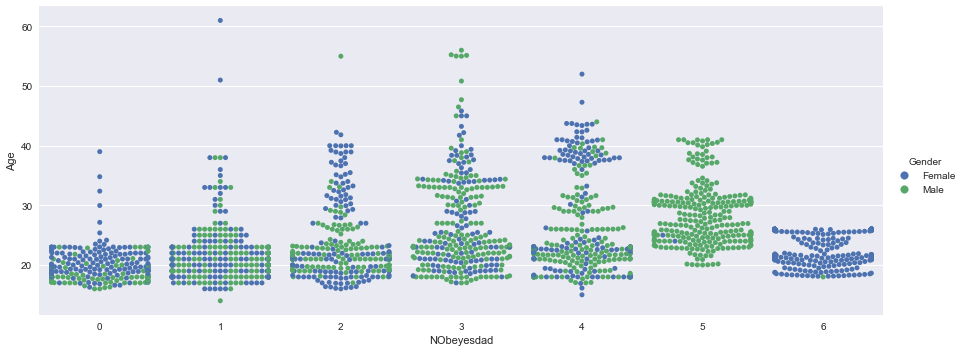

In [353]:
sns.catplot(x="NObeyesdad", y="Age", hue="Gender",kind="swarm", data=df[["NObeyesdad","Age","Gender"]],  height=5, aspect=2.5)
plt.show()

From the graph we can see that in "Insufficient_Weight" and in "Obesity_Type_III".<br>
In addition we can see that in "Obesity Type II" there are mostly males and in "Obesity Type III" there are mostly females.

##### We need to change the categorial attribute to numeric values.<br>We will use "get_dummies" to change some of the columns.<br>

In [354]:
df_res = df.copy(deep=True)
df_res = pd.get_dummies(df, columns=['Gender','family_history_with_overweight','FAVC','SMOKE',
                                     'SCC','MTRANS','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC'])
df_res.head(3)

,Age,Height,Weight,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,...,FAF_1,FAF_2,FAF_3,TUE_0,TUE_1,TUE_2,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,21.0,1.62,64.0,1,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,21.0,1.52,56.0,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
2,23.0,1.80,77.0,1,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


We have many features. We would like to check the correlation that each of them has with the "NObeyesdad" column.<br>
Therefore, we will first check the correlations of each column with the "NObeyesdad" column.<br>
Then we will check the correlations of the columns that had a very high or very low correlation.

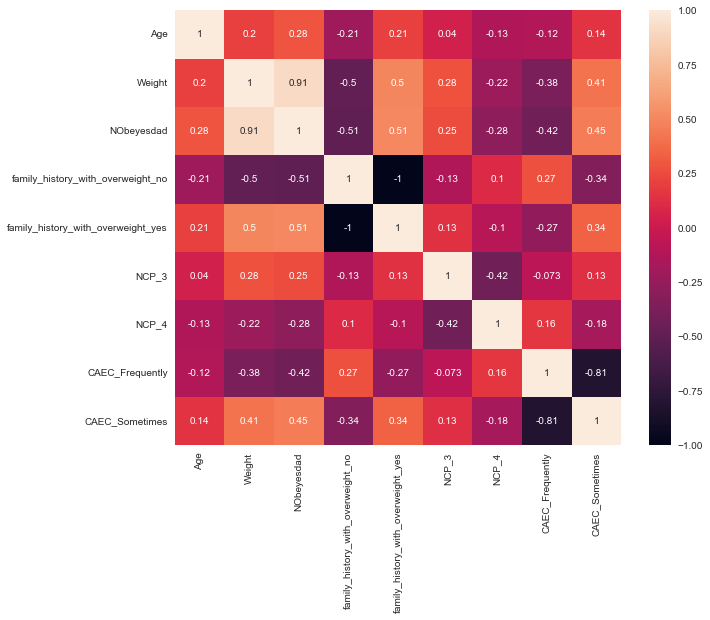

In [355]:
cor_df = df_res.copy(deep=True)
for (index, col) in enumerate(cor_df):
     if (df_res['NObeyesdad'].corr(df_res[col])) <0.25 and (df_res['NObeyesdad'].corr(df_res[col])) >- 0.25:
         cor_df.drop(columns=col,inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor_df.corr(), annot=True)
plt.show()

From the CorrMatrix we can see that 'Weight' and 'family history with overweight' are highly correlated with "NObeyesdad" .


In [356]:
# Weight is highly correlated and is directly correlate to the BMI calc used for the target
# Remove Weight
df_res = df_res.drop(columns=['Weight'])

In [357]:
df_res['NObeyesdad'] = df_res['NObeyesdad'].map({0:'Insufficient_Weight', 1:'Normal_Weight', 2:'Overweight_Level_I' ,
                                             3:'Overweight_Level_II', 4:'Obesity_Type_I',5:'Obesity_Type_II',6:'Obesity_Type_III'})

In [358]:
# Let's split the data into train and test 
from sklearn.model_selection import train_test_split
X = df_res.drop(columns=["NObeyesdad"])
y = df_res['NObeyesdad'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Models:

We will try several models and in the end we will decide which is the best model.<br>
We will try the following models:
* Decision Trees
* Random Forest
* KNN

In [359]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [360]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(X_train_norm, y_train)
dummy_clf.predict(X_train_norm)
print("The DummyClassifier score is:" ,dummy_clf.score(X_test_norm, y_test) )

The DummyClassifier score is: 0.1608832807570978


The simplest measure for evaluating the model is accuracy,
which is the ratio between the correct classifications and the total number of classifications.<br> 
The problem with accuracy is that it is reliable only on condition that the samples in the data are balanced.<br>
As we presented at the beginning of the project, the weight types in the data are indeed balanced.<br>
Therefore, we will choose to use this measure.

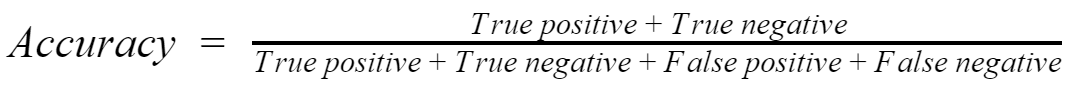

In [361]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [328]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier().fit(X_train_norm, y_train)
y_pred = KNN.predict(X_test_norm)
norm_accuracy = round(metrics.accuracy_score(y_test, y_pred),3)            
print("Accuracy:", norm_accuracy)

print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.711
Classification Report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.72      0.88      0.80        86
      Normal_Weight       0.78      0.33      0.47        93
     Obesity_Type_I       0.65      0.76      0.70       102
    Obesity_Type_II       0.64      0.90      0.75        88
   Obesity_Type_III       0.84      0.99      0.91        98
 Overweight_Level_I       0.71      0.53      0.61        88
Overweight_Level_II       0.66      0.54      0.60        79

           accuracy                           0.71       634
          macro avg       0.72      0.71      0.69       634
       weighted avg       0.72      0.71      0.69       634



In [329]:
#DecisionTree 
from sklearn.tree import DecisionTreeClassifier 
DTC = DecisionTreeClassifier().fit(X_train_norm, y_train)
y_pred = DTC.predict(X_test_norm)
norm_accuracy = round(metrics.accuracy_score(y_test, y_pred),5)            
print("Accuracy:", norm_accuracy)
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.70189
Classification Report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.69      0.74      0.72        86
      Normal_Weight       0.43      0.28      0.34        93
     Obesity_Type_I       0.73      0.69      0.71       102
    Obesity_Type_II       0.78      0.86      0.82        88
   Obesity_Type_III       0.97      0.99      0.98        98
 Overweight_Level_I       0.64      0.73      0.68        88
Overweight_Level_II       0.55      0.61      0.57        79

           accuracy                           0.70       634
          macro avg       0.68      0.70      0.69       634
       weighted avg       0.69      0.70      0.69       634



In [330]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42).fit(X_train_norm, y_train)
y_pred = RF.predict(X_test_norm)
norm_accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
print("Accuracy:", norm_accuracy)
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.80442
Classification Report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.80      0.90      0.85        86
      Normal_Weight       0.62      0.53      0.57        93
     Obesity_Type_I       0.78      0.81      0.80       102
    Obesity_Type_II       0.85      0.95      0.90        88
   Obesity_Type_III       0.97      0.99      0.98        98
 Overweight_Level_I       0.84      0.69      0.76        88
Overweight_Level_II       0.73      0.75      0.74        79

           accuracy                           0.80       634
          macro avg       0.80      0.80      0.80       634
       weighted avg       0.80      0.80      0.80       634



After we ran the models, we have reserched on the difference between Random forest and DecisionTree.
DecisionTree is a graph structure which uses branching method and it provides result in every possible way whereas,<br>
random forest combines a decision trees its result depends on all its decision trees.

Since Random Forest had a better score than a Decision tree, we won't try to improve DecisionTree.

# Hyperparameter Tuning

In [331]:
#Searching for better performance out of the models with Gridsearch
from sklearn.model_selection import GridSearchCV

#### KNN

In [300]:
parameters = {'n_neighbors':[int(x) for x in range(4, 20)],
              'weights':['uniform','distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev'],
              'p':[1,2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
search_KNN = GridSearchCV(KNeighborsClassifier(),parameters, verbose=True, n_jobs=15, 
                          cv=5,return_train_score=True, scoring='accuracy')
search_KNN.fit(X_train_norm,y_train)
y_pred_KNN = search_KNN.predict(X_test_norm)
norm_accuracy = round(metrics.accuracy_score(y_test, y_pred_KNN),5)
print ("Accuracy Score =",(norm_accuracy))
print (search_KNN.best_params_)
#print ("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_KNN))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Accuracy Score = 0.74763
{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


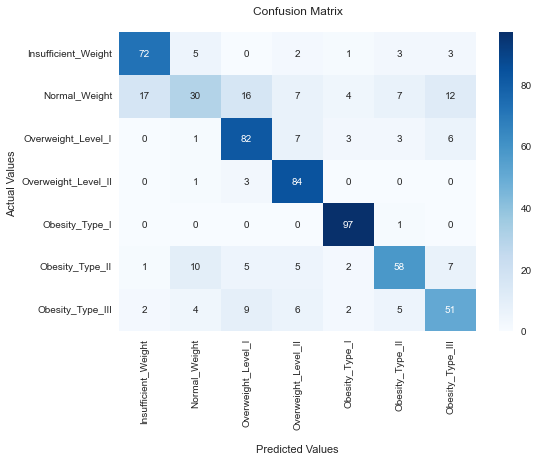

In [335]:
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
cf_matrix = confusion_matrix(y_test, y_pred_KNN)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I','Overweight_Level_II',
                         'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],rotation=90)
ax.yaxis.set_ticklabels(['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II',
                        'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],rotation=0)
plt.show()

#### Random Forest


In [339]:
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
parameters = {'criterion':['gini','entropy'],
               'n_estimators': [int(x) for x in range(10, 200,10)],
               'max_depth':max_depth}
RFsearch = GridSearchCV(RandomForestClassifier(random_state=42), parameters,verbose=True, n_jobs=15,
                        cv=5,return_train_score=True,scoring='accuracy')
RFsearch.fit(X_train_norm,y_train)
y_pred = RFsearch.predict(X_test_norm)
print ("Accuracy Score = " ,(RFsearch.score(X_test_norm,y_test)))
print (RFsearch.best_params_)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Accuracy Score =  0.8154574132492114
{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 70}


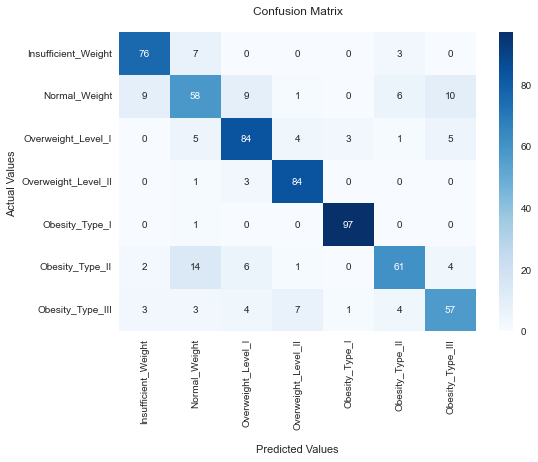

In [340]:
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
cf_matrix = confusion_matrix(y_test, y_pred)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I','Overweight_Level_II',
                         'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],rotation=90)
ax.yaxis.set_ticklabels(['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II',
                        'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],rotation=0)
plt.show()

#ניתן לראות מהקומפיון מטריקס שהמודל שלנו מזהה בצורה טובה מאד את אוביסטי סוג 1.
#לעומת זאת, בנורמל וויט ובאובסטי טייפ 2 קורה משו מוזר, המודל חוזה (מספר לא מועט של פעמים ) שאדם במשקל נורמלי הוא אוביס מסוג 3.
#בנוסף באובסטי טייפ 2 המודל חוזה 14 פעמים שהאדם מסוג נורמל וויט.
#הדבר הנכון (והמעניין) לעשות הוא לקחת את הנתונים שהמודל חזה ולחבר אותם לדאטה סט שלנו ולראות האם יש משו משפותף לכל האנשים שבהם המודל חזה בצורה את המשקל שלהם רחוק מאד ממה שהוא 


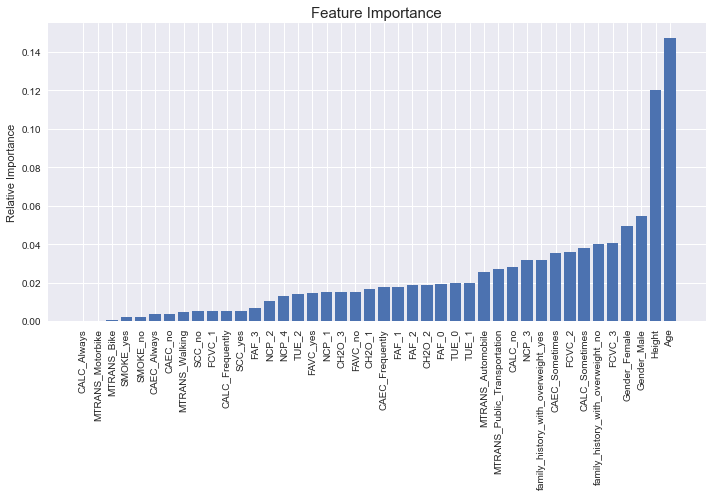

In [167]:
importances = best_RF.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,7))
plt.title('Feature Importance',fontsize=15)
plt.bar(range(X_train_norm.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_norm.shape[1]), X_train.columns[indices], rotation=90)
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

#מגרף חשיבות המשתנים, אנחנו יכולים שהגיל והגבוה הם המשתנים החזקים ביותר (שכל הנראה גם גרמו לבלבול שראינו בקומפיוזן מטריקס).
#ניתן לראות שייש לא מעט משתנים עם אחוז חשיבות די נמוך, בכדי לשפר את המודל היינו יכולות לנסות להוריד אותם מהדאטה שלנו ולאחר מכאן להפעיל שוב את המודל ואולי הוא היה מניב ציון יותר טוב.

### In conclusion:
The model that yielded the best score is Random Forest.
 
### Things that can be improved:
 * A deeper understanding of the importance of each feature on the model score and removing unnecessary features will probably  help the model to yield a higher score. 
    
 * After running the models we realized that our model would probably yield a better score if we reduced the amount of weight   types it could classify into. (From 7 to 4 for example)
 
 * Our best model was able to classify 82% of the data into 7 categories. Pretty impressive (: